In [9]:
import interlo as iso
from astropy import units as u
from matplotlib import pyplot as plt
import math
import numpy as np

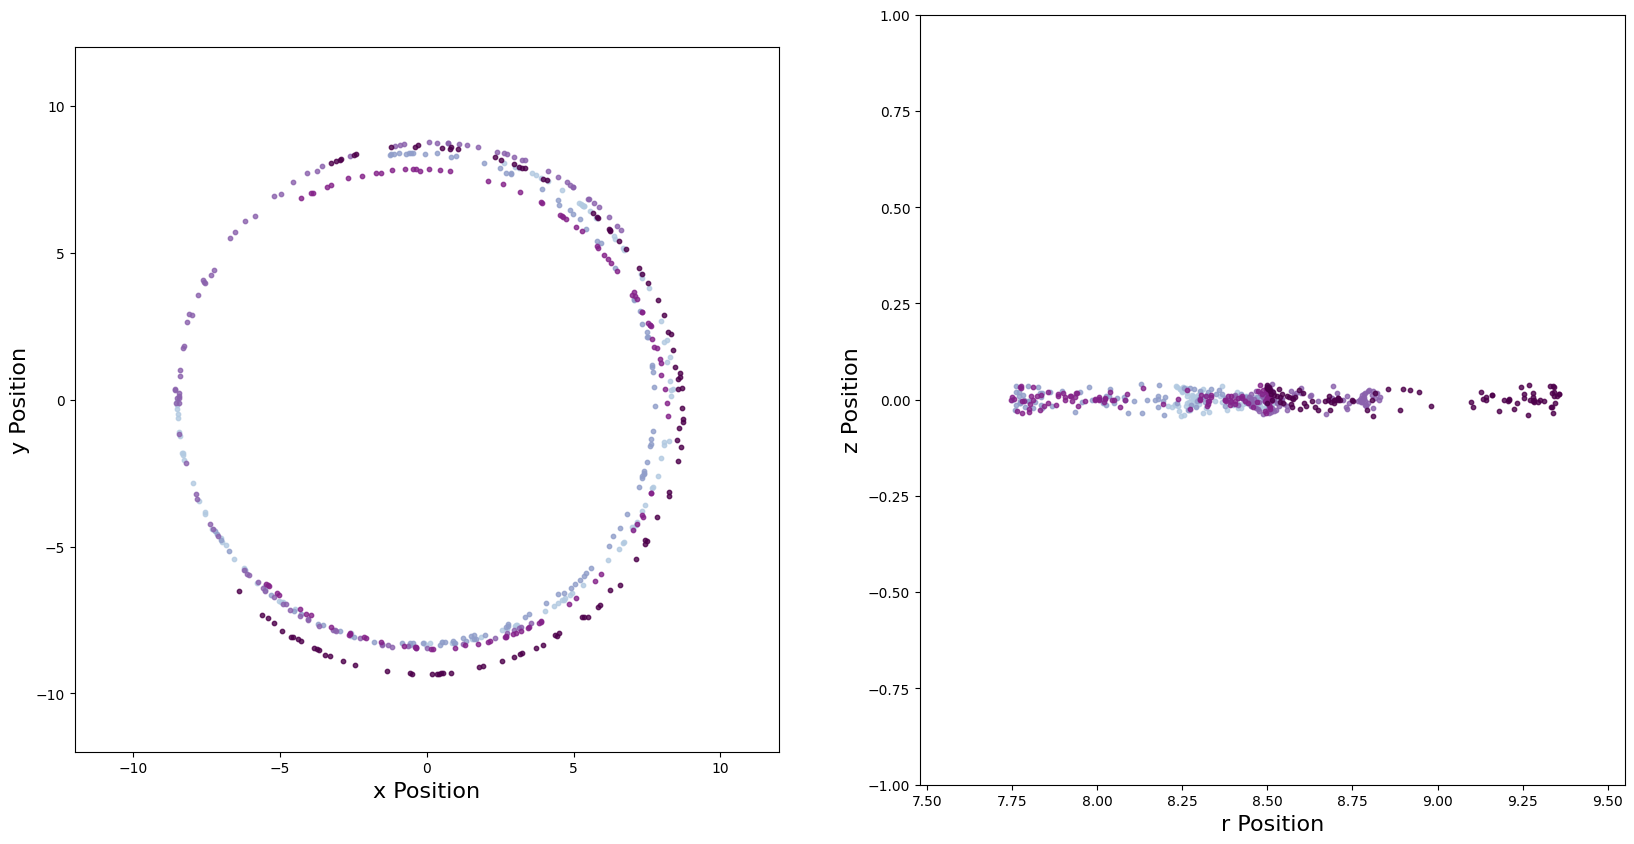

In [11]:
stars = iso.Starset(num_stars=5,r_extent=0,z_extent=0,radial_dispersion=.1,azimuthal_dispersion=.01,z_dispersion=.01)
stars.get_isos(num_per_star=1000,v_eject=3)
stars.integrate()
stars.animate_position()

In [6]:
stars = iso.Starset(num_stars=10,r_extent=0,z_extent=0,radial_dispersion=.1,azimuthal_dispersion=.01,z_dispersion=.01)
#stars = iso.Starset(num_stars=5)
stars.get_isos(num_per_star=1000,v_eject=3)
stars.integrate()

In [7]:
TIMES = [.1,1,5]*u.Gyr
num_times = TIMES.shape[0]
fig, axes = plt.subplots(ncols = num_times, figsize=(10*num_times,10))
#fig.set_facecolor('lightgrey')

for star in range(stars.num_stars):
    for i,time in enumerate(TIMES):
        axes[i].set_title(f"After {time.value} Gyr",fontsize=40,fontname = 'Ayuthaya')
        if i == 0:
            axes[i].set_ylabel("y position (kpc)",fontsize=25,fontname = 'Ayuthaya')
            axes[i].tick_params(axis='y', labelsize=20)
        axes[i].set_xlabel("x position (kpc)",fontsize=25,fontname = 'Ayuthaya')
        axes[i].tick_params(axis='x', labelsize=20)
        
        width = 9.5
        axes[i].set_xlim([-width,width])
        axes[i].set_ylim([-width,width])

        x = stars.isos[star].orbits.x(time)
        y = stars.isos[star].orbits.y(time)
        axes[i].scatter(x,y,s=20)
        
fig.subplots_adjust(wspace=0)

RuntimeError: Requested MovieWriter (ffmpeg) not available

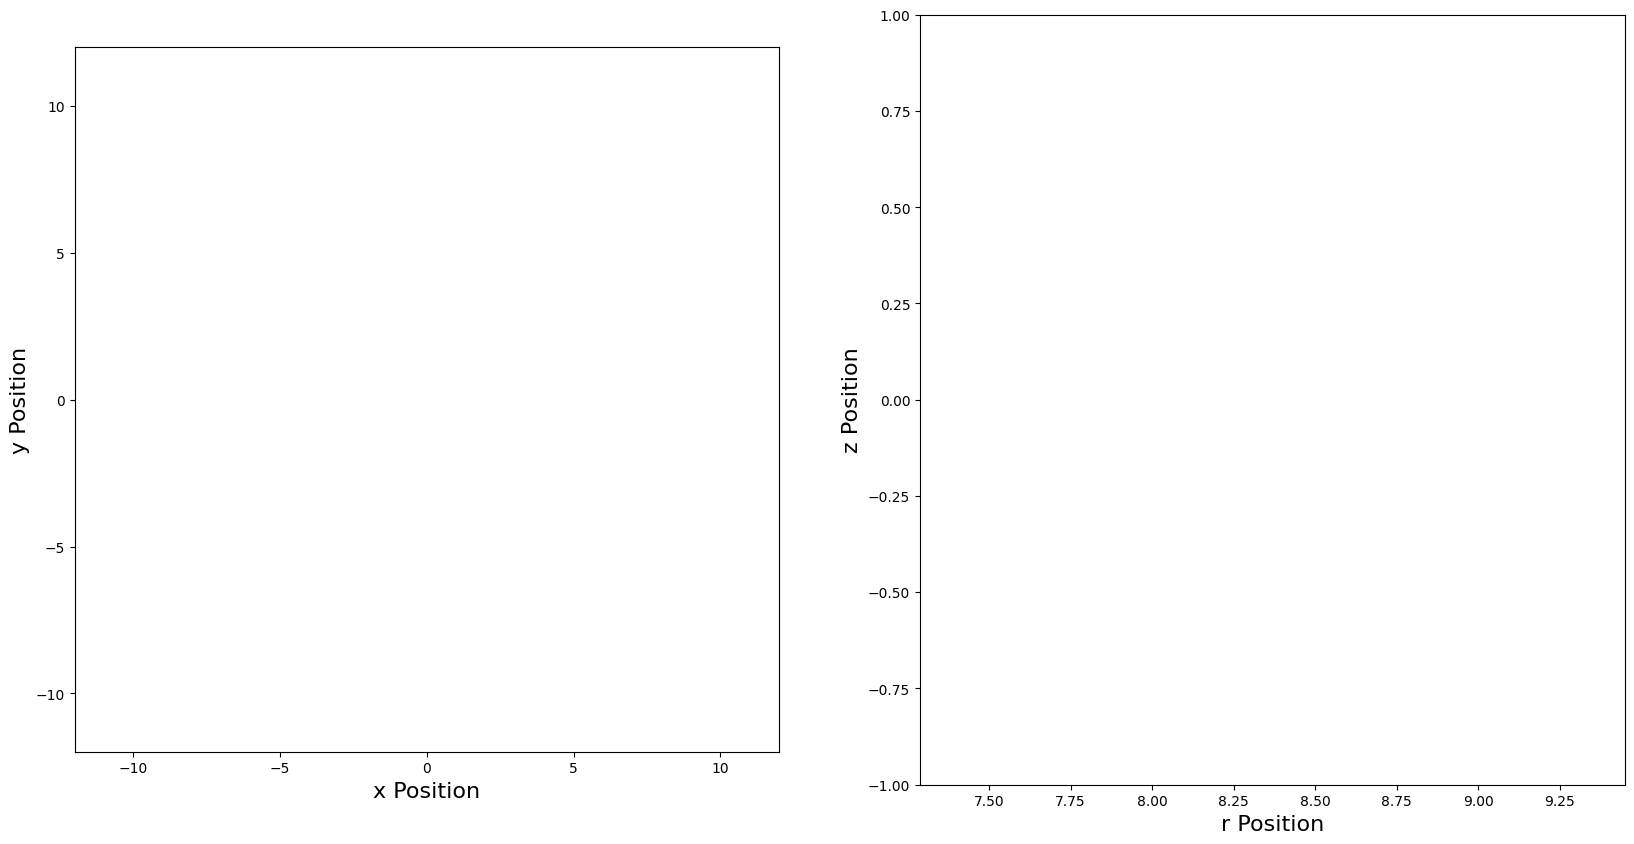

In [8]:
stars.isos[0].plot_radius()

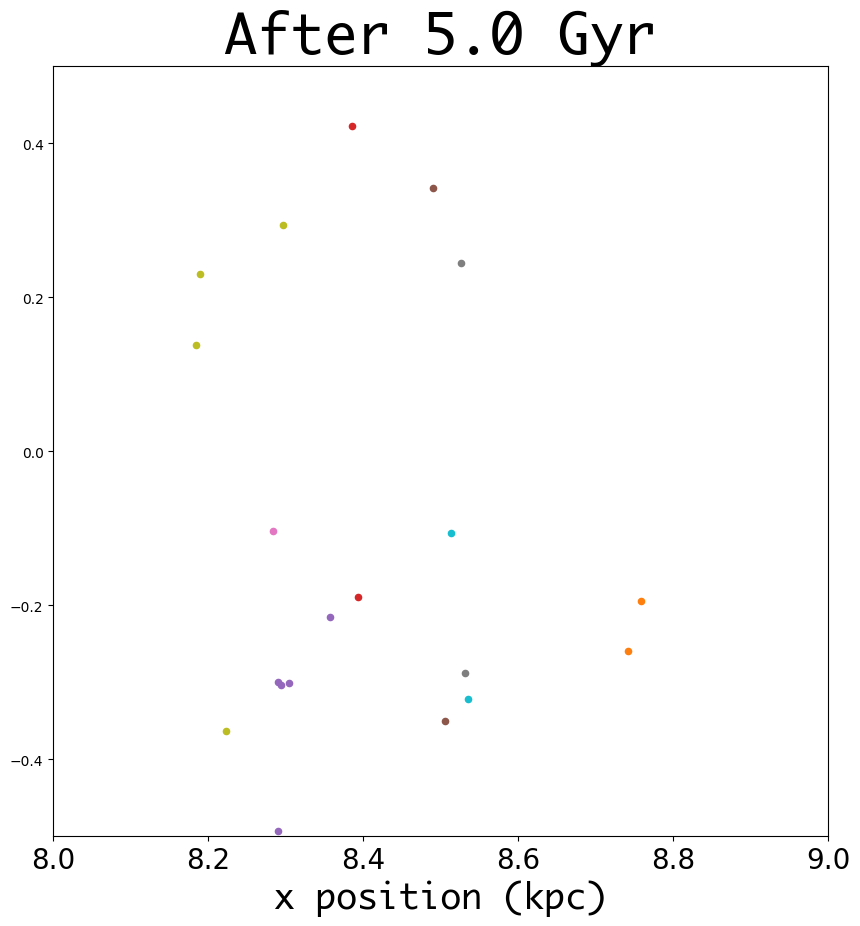

In [56]:
TIMES = 5*u.Gyr
fig, axes = plt.subplots(figsize=(10,10))

for star in range(stars.num_stars):
    axes.set_title(f"After {time.value} Gyr",fontsize=40,fontname = 'Ayuthaya')
    if i == 0:
        axes.set_ylabel("y position (kpc)",fontsize=25,fontname = 'Ayuthaya')
        axes.tick_params(axis='y', labelsize=20)
    axes.set_xlabel("x position (kpc)",fontsize=25,fontname = 'Ayuthaya')
    axes.tick_params(axis='x', labelsize=20)
    
    width = .5
    axes.set_xlim([8.5-width,8.5+width])
    axes.set_ylim([-width,width])

    x = stars.isos[star].orbits.x(time)
    y = stars.isos[star].orbits.y(time)
    axes.scatter(x,y,s=20)
        
fig.subplots_adjust(wspace=0)

In [60]:
TIMES = [.1,1,5]*u.Gyr
num_times = TIMES.shape[0]
fig, axes = plt.subplots(ncols = num_times, figsize=(10*num_times,10))

for star in range(stars.num_stars):
    for i,time in enumerate(TIMES):
        axes[i].set_title(f"After {time.value} Gyr",fontsize=40,fontname = 'Ayuthaya')
        if i == 0:
            axes[i].set_ylabel("r position (kpc)",fontsize=25,fontname = 'Ayuthaya')
            axes[i].tick_params(axis='y', labelsize=20)
        axes[i].set_xlabel("theta position (radians)",fontsize=25,fontname = 'Ayuthaya')
        axes[i].tick_params(axis='x', labelsize=20)
        
        width = math.pi
        extent = 1
        init = 8.5
        axes[i].set_xlim([-width,width])
        axes[i].set_ylim([init-extent,init+extent])

        thetaDifference = math.pi - (stars.isos[star].orbits.phi(time) + stars.orbits[star].phi(time))

        thetaDifferenceAdjusted = np.where(abs(thetaDifference) > math.pi,\
                                       -1*np.sign(thetaDifference)*(2*math.pi - abs(thetaDifference)), thetaDifference)
        r = stars.isos[star].orbits.r(time)

        axes[i].scatter(thetaDifferenceAdjusted, r, s=20)
        
fig.subplots_adjust(wspace=0)

In [25]:
stars.isos[star].orbits.phi(time) 

array([ 0.68110919,  1.06985333, -1.33286963,  1.1603138 , -2.02422391,
       -1.50150514, -2.97038887,  3.09515886, -1.43922631, -1.06526122,
        0.81583577, -1.36841663, -2.07107771, -0.27701322, -1.34430263,
       -3.03538075,  1.2562402 ,  0.34885043,  0.26864116, -2.04014186,
        0.74356995, -3.04949145, -0.46236562, -0.37520082, -0.4408154 ,
       -0.8733727 , -2.38775414, -2.10959238, -1.56646192, -2.05468448,
       -0.55616114, -1.74417166, -1.16666398, -0.84392956,  1.06318533,
       -1.37841661, -1.94986474, -1.48748874, -0.16269023, -2.57849328,
       -0.61620924, -2.62783107,  0.3691211 , -1.72371521, -1.51139787,
       -2.74981773, -2.60610037,  0.08253533, -1.01221362,  0.22859912,
       -3.01350302, -2.08312648, -0.08456817,  3.13811914, -1.37118102,
       -2.45953015, -2.52569843,  0.75483419,  1.15715194, -0.59764007,
       -0.72785119,  1.1996158 , -0.70084607, -2.88008009, -0.4766093 ,
        0.55987657,  0.10878557, -1.32037407, -0.25411899, -1.11

In [26]:
stars.orbits[star].phi(time)

-2.1632390963046255

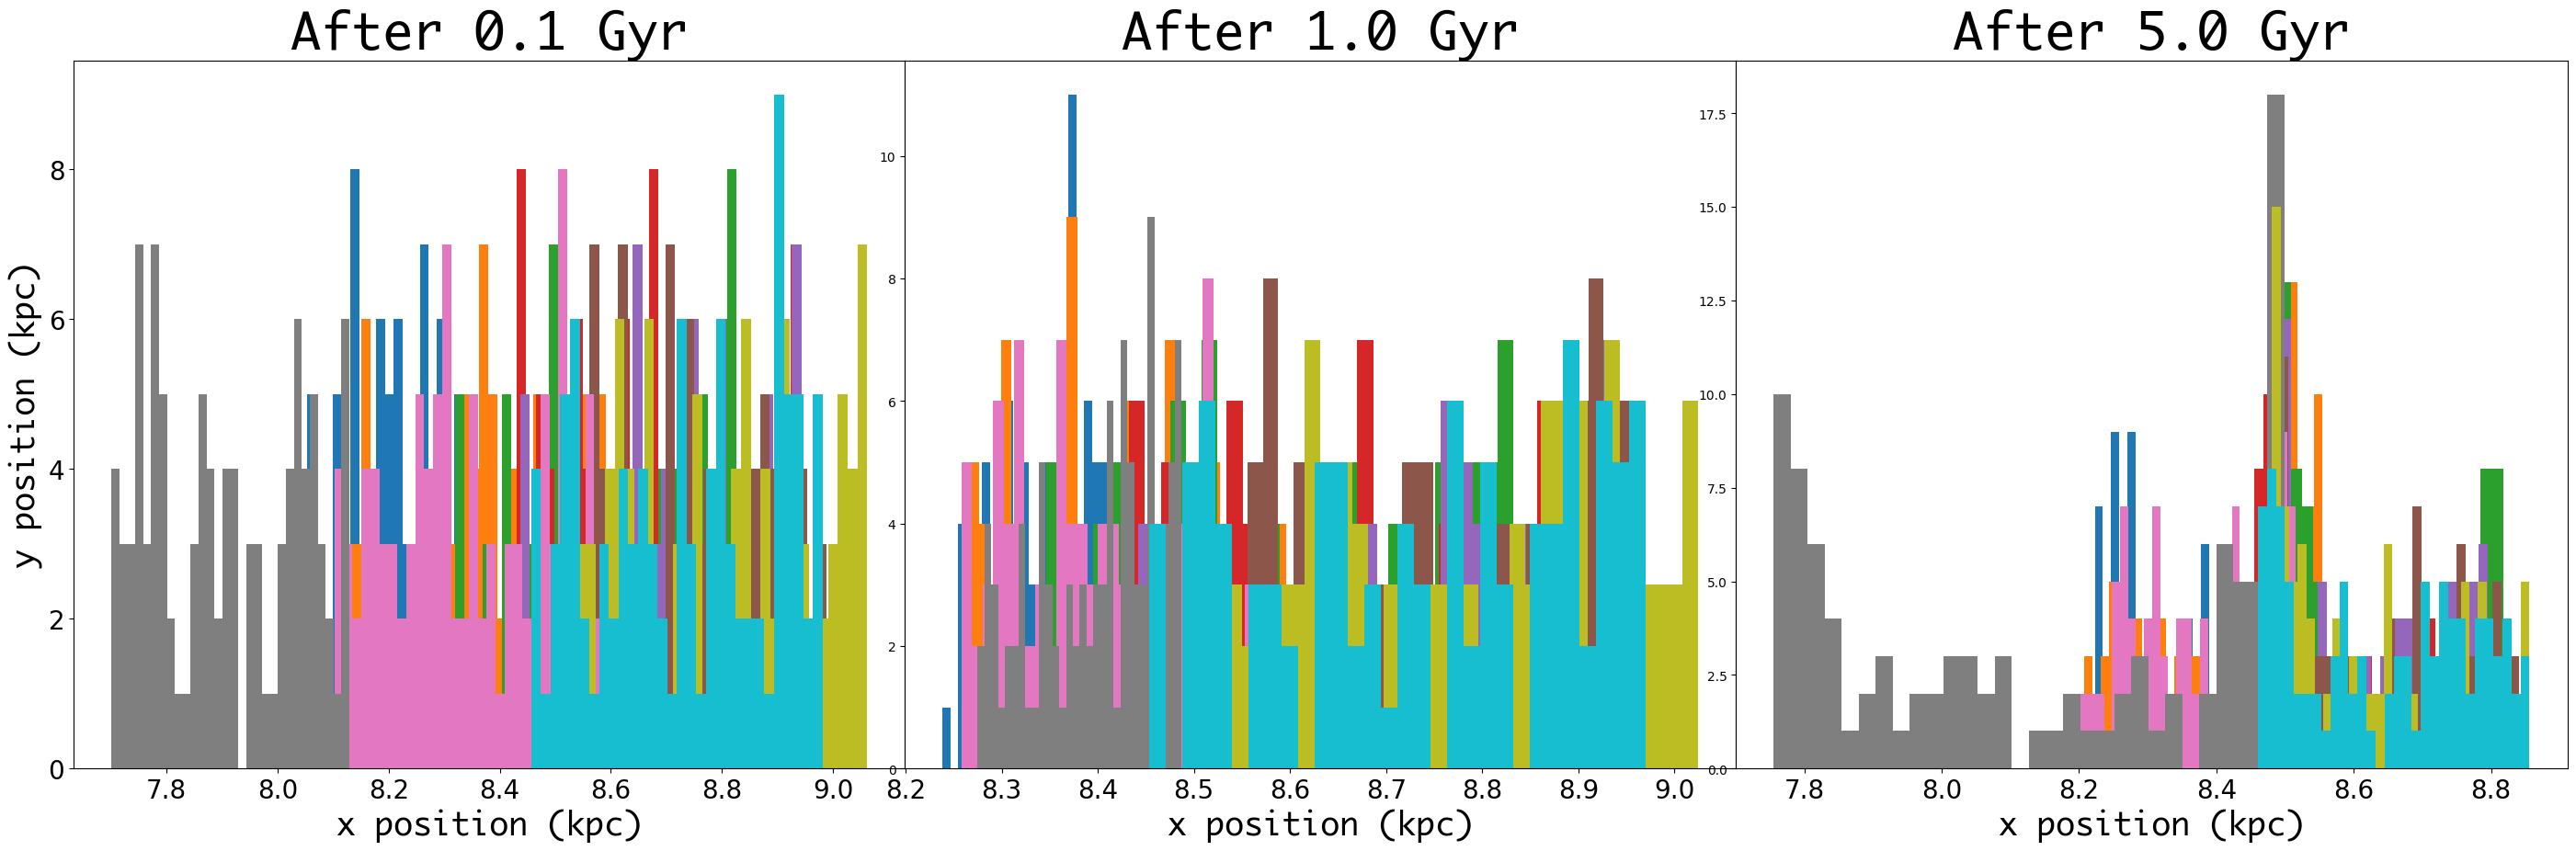

In [36]:
TIMES = [.1,1,5]*u.Gyr
num_times = TIMES.shape[0]
bins = [70,50,20]

fig, axes = plt.subplots(ncols = num_times, figsize=(10*num_times + 5,10))

for star in range(stars.num_stars):
    for i,time in enumerate(TIMES):
        axes[i].set_title(f"After {time.value} Gyr",fontsize=40,fontname = 'Ayuthaya')
        if i == 0:
            axes[i].set_ylabel("y position (kpc)",fontsize=25,fontname = 'Ayuthaya')
            axes[i].tick_params(axis='y', labelsize=20)
        axes[i].set_xlabel("x position (kpc)",fontsize=25,fontname = 'Ayuthaya')
        axes[i].tick_params(axis='x', labelsize=20)
        
        width = 2
        start = 8.5
        #axes[i].set_xlim([start-width,start+width])
        #axes[i].set_ylim([-width,width])

        r = stars.isos[star].orbits.r(time)
        axes[i].hist(r, bins = 30)
        
fig.subplots_adjust(wspace=0)